### Dataset Analysis
In this notebook, I do some simple statistic and check some samples of the dataset.
Note that the idea to analysis of the dataset comes from the notebook in kaggle(this is a reference for the source code): https://www.kaggle.com/taha07/cataract-prediction-using-vgg19

In [7]:
# import libraries needed for analysis
import random
import os

import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
# define some constant variable here
full_df_path = "dataset/full_df.csv"
root_path = "dataset/preprocessed_images"
img_size = 224

In [9]:
df = pd.read_csv(full_df_path)
# the labels in df is a string list like "['N']", take it off
df.labels = df.labels.apply(lambda i: i[2])

In [10]:
df.head(3)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,N,"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,N,"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,D,"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg


#### Analysis of preprocessed dataset
There are 8 classes in total, but we are required to do a binary classification,
so I regard normal class as positive label, and I want to choose the negative cases from the rest classes.
In this part, I firstly present the total images number, average patient age, and sex ratio of each class in a table,
and then plot some figures from the other 7 classes and compare with the normal class.
As you can see in the following figures, the first row is the images randomly chose from dataset which are labeled as normal.

In [11]:
"""
retrieve one kind of disease from:
Normal -N, Diabetes – D, Glaucoma – G, Cataract – C, Age related Macular Degeneration – A,
Hypertension – H, Pathological Myopia – M, Other diseases/abnormalities – O
"""
def retrieve_filename(label_name):
    files = df.loc[df.labels == label_name]["filename"].values
    return files
# retrieve filenames of normal and disease cases, I treat all the cases that is not normal as disease
normal = retrieve_filename("N")
diabetes = retrieve_filename("D")
glaucoma = retrieve_filename("G")
cataract = retrieve_filename("C")
armd = retrieve_filename("A")
hypertension = retrieve_filename("H")
myopia = retrieve_filename("M")
other = retrieve_filename("O")

In [15]:
# show some statistic information of dataset, such as age and count
group_df = df[["labels", "Patient Age", "Patient Sex"]].groupby(["labels"])
info_df = pd.DataFrame(columns=["label", "mean_age", "male_ratio", "count"])
for (label, group) in group_df:
    male_ratio = round(group["Patient Sex"].value_counts()["Male"] / len(group), 4)
    info_data = {"label": label, "mean_age": round(group["Patient Age"].mean(), 2), "male_ratio": male_ratio, "count": len(group)}
    info_df = info_df.append(pd.Series(info_data), ignore_index=True )
info_df

,label,mean_age,male_ratio,count
0,A,61.21,0.5301,266
1,C,66.76,0.4266,293
2,D,55.70,0.5697,1608
3,G,63.02,0.5845,284
4,H,57.05,0.6328,128
5,M,54.89,0.3233,232
6,N,57.18,0.5458,2873
7,O,59.61,0.4972,708


In [16]:
print(info_df.to_latex(index=False))

\begin{tabular}{lrrl}
\toprule
label &  mean\_age &  male\_ratio & count \\
\midrule
    A &     61.21 &      0.5301 &   266 \\
    C &     66.76 &      0.4266 &   293 \\
    D &     55.70 &      0.5697 &  1608 \\
    G &     63.02 &      0.5845 &   284 \\
    H &     57.05 &      0.6328 &   128 \\
    M &     54.89 &      0.3233 &   232 \\
    N &     57.18 &      0.5458 &  2873 \\
    O &     59.61 &      0.4972 &   708 \\
\bottomrule
\end{tabular}



I found that the average age of A(61.21), C(66.76), G(63.02) and O(59.61) is higher than normal cases(57.18).
And the male ratio of C(42.66%) and M(32.33%) is pretty low compare to normal cases(54.58%), while H is much higher(63.28%).
This information may help us classify the image if we can encode them properly.

In [87]:
# plot a sample of specific case from the dataset
def plot_sample(files, index, title, lines=8):
    sample = random.choice(range(len(files)))
    image = cv2.imread(os.path.join(root_path, files[sample]), cv2.IMREAD_COLOR)
    image = image[:,:,[2,1,0]]
    plt.subplot(lines, 5, index)
    plt.imshow(image)
    plt.xlabel(f"{files[sample]}: {title}")

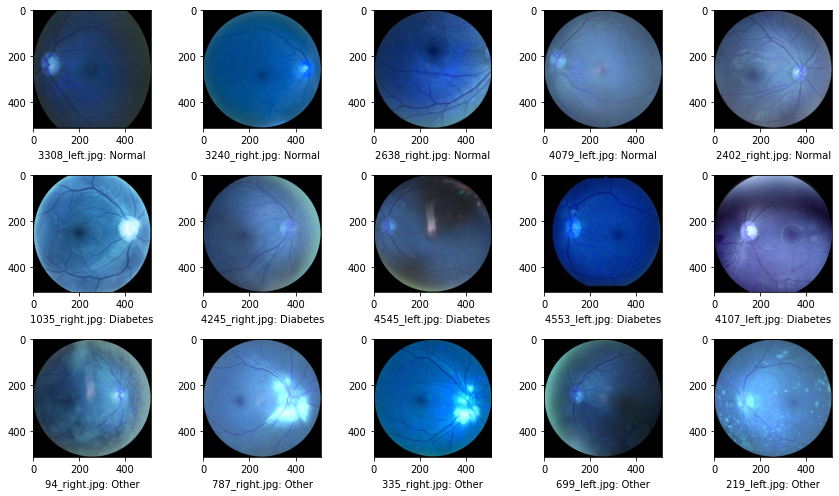

In [11]:
"""
Compare the images among normal cases, diabetes cases, and other diseases/abnormalities cases
"""
total_lines = 3
random.seed(42)
plt.figure(figsize=(12,7))
for i in range(5):
    # plot a normal case
    plot_sample(normal, i+1, "Normal", total_lines)
    # plot a diabetes case
    plot_sample(diabetes, i+6, "Diabetes", total_lines)
    # plot a other disease case
    plot_sample(other, i+11, "Other", total_lines)
plt.tight_layout()

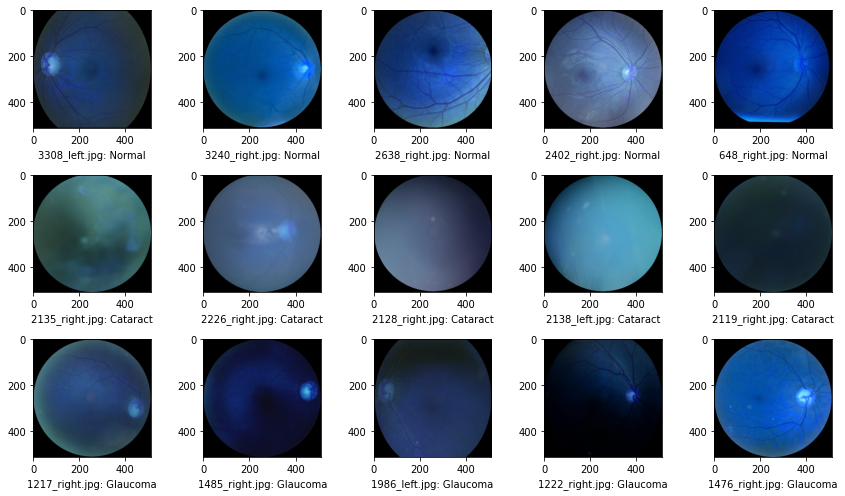

In [12]:
"""
Compare the images among normal cases, cataract cases, and glaucoma cases
"""
total_lines = 3
random.seed(42)
plt.figure(figsize=(12,7))
for i in range(5):
    # plot a normal case
    plot_sample(normal, i+1, "Normal", total_lines)
    # plot a diabetes case
    plot_sample(cataract, i+6, "Cataract", total_lines)
    # plot a other disease case
    plot_sample(glaucoma, i+11, "Glaucoma", total_lines)
plt.tight_layout()


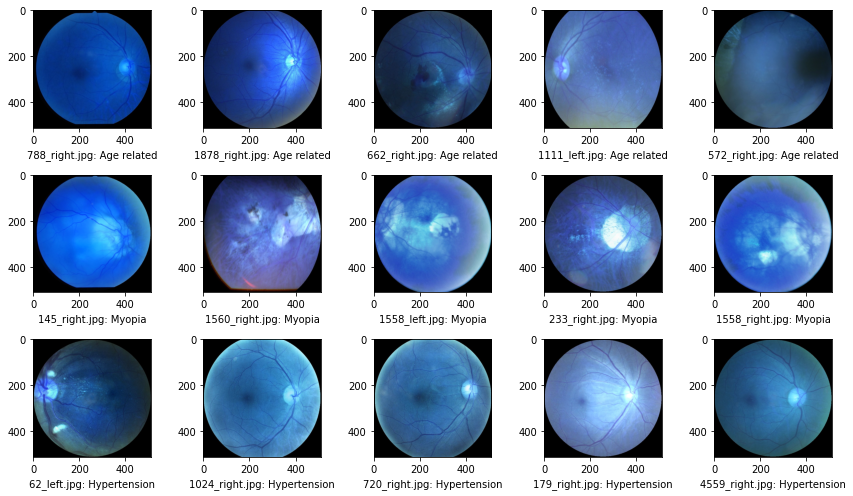

In [13]:
"""
Compare the images among Age related Macular Degeneration cases, myopia cases, and hypertension cases
"""
total_lines = 3
random.seed(42)
plt.figure(figsize=(12,7))
for i in range(5):
    # plot a normal case
    plot_sample(armd, i+1, "Age related", total_lines)
    # plot a diabetes case
    plot_sample(myopia, i+6, "Myopia", total_lines)
    # plot a other disease case
    plot_sample(hypertension, i+11, "Hypertension", total_lines)
plt.tight_layout()

According to above figures, I found that cataract cases, glaucoma cases, and myopia cases are distinct from normal cases.
For better comparison, I put them together in the following figure to see the difference.

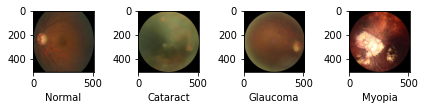

In [64]:
"""
Comparison of cataract cases, glaucoma cases, and myopia cases have the most recognizable features compare to normal cases.
"""
def plot_image(files, index, title, lines=8, row=4):
    sample = random.choice(range(len(files)))
    image = cv2.imread(os.path.join(root_path, files[sample]), cv2.IMREAD_COLOR)
    image = image[:,:,[2,1,0]]
    plt.subplot(lines, row, index)
    plt.imshow(image)
    plt.xlabel(f"{title}")
total_lines = 1
random.seed(42)
plt.figure(figsize=(6,12))
# plot a normal case
plot_image(normal, 1, "Normal", total_lines)
# plot a cataract case
plot_image(cataract, 2, "Cataract", total_lines)
# plot a glaucoma case
plot_image(glaucoma, 3, "Glaucoma", total_lines)
# plot a myopia case
plot_image(myopia, 4, "Myopia", total_lines)
plt.tight_layout()
plt.savefig("figs/N_CGM.png", dpi=200)


#### Analysis of diagnostic keyword
I found that the diagnostic keyword is quiet different. Even though in the same class, there are different description.

In [17]:
# re-organize labels from full_df.csv file, only keep important information
new_df = df[["ID", "labels", "filename", "Left-Diagnostic Keywords", "Right-Diagnostic Keywords"]].copy()
new_df.head(3)

,ID,labels,filename,Left-Diagnostic Keywords,Right-Diagnostic Keywords
0,0,N,0_right.jpg,cataract,normal fundus
1,1,N,1_right.jpg,normal fundus,normal fundus
2,2,D,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy


In [18]:
# extract keywords from Left(Right)-Diagnostic column according to filename
new_df["keywords"] = ""
# find corresponding index
left_index = ["left" in file for file in df["filename"].values]
right_index = ["right" in file for file in df["filename"].values]
# apply to a new column named keywords
new_df.loc[left_index, "keywords"] = new_df["Left-Diagnostic Keywords"][left_index]
new_df.loc[right_index, "keywords"] = new_df["Right-Diagnostic Keywords"][right_index]
# drop original diagnostic column
new_df = new_df.drop(columns=["Left-Diagnostic Keywords", "Right-Diagnostic Keywords"])
new_df.head(3)

,ID,labels,filename,keywords
0,0,N,0_right.jpg,normal fundus
1,1,N,1_right.jpg,normal fundus
2,2,D,2_right.jpg,moderate non proliferative retinopathy


In [53]:
group_df = new_df.groupby(["labels"])
kw_df = pd.DataFrame(columns=["category", "keywords count", "most frequent keyword", "count"])
for label, group in group_df:
    values = group.keywords.unique()
    values_count = {v: len(group[group.keywords == v]) for v in values}
    values_count = sorted(values_count.items(), key=lambda i: i[1], reverse=True)
    kw = {"category": label, "keywords count": len(values), "count": len(group),
          "most frequent keyword": f"{values_count[0][0]}({values_count[0][1]})"}
    kw_df = kw_df.append(pd.Series(kw), ignore_index=True)
kw_df.head(3)

,category,keywords count,most frequent keyword,count
0,A,14,dry age-related macular degeneration(196),266
1,C,11,cataract(262),293
2,D,63,moderate non proliferative retinopathy(745),1608


In [56]:
print(new_df[new_df.labels == "N"].keywords.unique())

['normal fundus' 'normal fundus，lens dust' 'normal fundus，normal fundus']


In [54]:
print(kw_df.to_latex(index=False))

\begin{tabular}{llll}
\toprule
category & keywords count &                       most frequent keyword & count \\
\midrule
       A &             14 &   dry age-related macular degeneration(196) &   266 \\
       C &             11 &                               cataract(262) &   293 \\
       D &             63 & moderate non proliferative retinopathy(745) &  1608 \\
       G &             22 &                               glaucoma(200) &   284 \\
       H &             13 &               hypertensive retinopathy(104) &   128 \\
       M &              4 &                    pathological myopia(227) &   232 \\
       N &              3 &                         normal fundus(2816) &  2873 \\
       O &             69 &                                 drusen(138) &   708 \\
\bottomrule
\end{tabular}



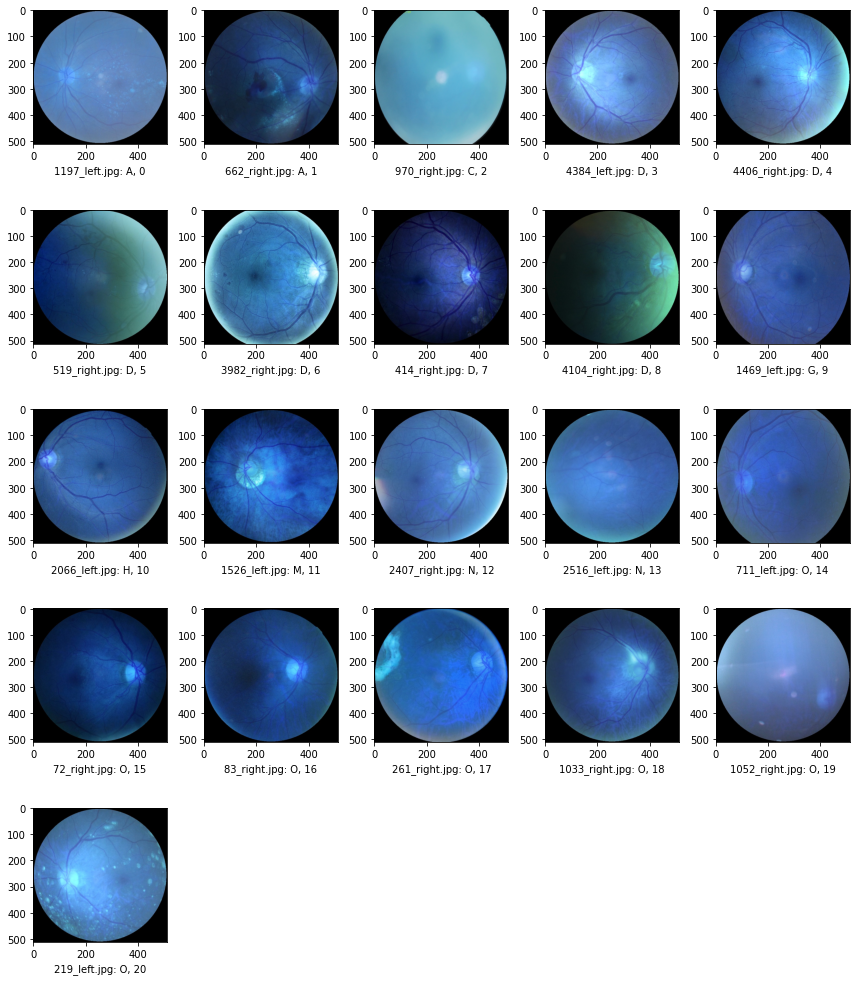

In [95]:
total_lines = 5
random.seed(42)
plt.figure(figsize=(12,14))
i = 0
for (label, keyword), group in group_df:
    if len(group) < 20: continue
    i += 1
    index = kw_df[kw_df["keywords"] == keyword].index[0]
    # plot a normal case
    plot_sample(group.filename.values, i, f"{label}, {index}", total_lines)
plt.tight_layout()

#### Compare with un-processed dataset


In [94]:
# compare original training images and preprocessed_images, and move the images that is not exist in the original training folder.
import shutil
original_training_path = "dataset/ODIR-5K/ODIR-5K/Training Images"
original_files = os.listdir(original_training_path)
preprocess_files = os.listdir(root_path)
removed_files = [file for file in original_files if file not in preprocess_files]
removed_path = [os.path.join(original_training_path, file) for file in removed_files]
check_path = "dataset/images_removed"
os.makedirs(check_path, exist_ok=True)
for file in removed_files:
    shutil.copy(os.path.join(original_training_path, file), os.path.join(check_path, file))

#### Data Augment Test
Augment normal cases images and compare the augmented images with original images.


In [104]:
train_df = pd.read_csv("dataset/train_df.csv")

In [127]:
import imgaug.augmenters as iaa
aug = iaa.GammaContrast((0.5, 1))
normal = [os.path.join("dataset/train_512", file) for file in train_df[train_df.labels == "N"].filename.values]
aug_files = [os.path.join("dataset/train_aug", f"aug_{file}") for file in train_df[train_df.labels == "N"].filename.values]

In [128]:
np.random.seed(42)
idx_full = np.arange(len(normal))
np.random.shuffle(idx_full)
images = [cv2.imread(path, cv2.IMREAD_COLOR)[:,:,[2,1,0]] for path in np.asarray(normal)[idx_full[0:10]]]

In [129]:
images_aug = aug(images=images)

In [120]:
for image_aug, index in zip(images_aug, idx_full[0:10]):
    cv2.imwrite(aug_files[index], image_aug)

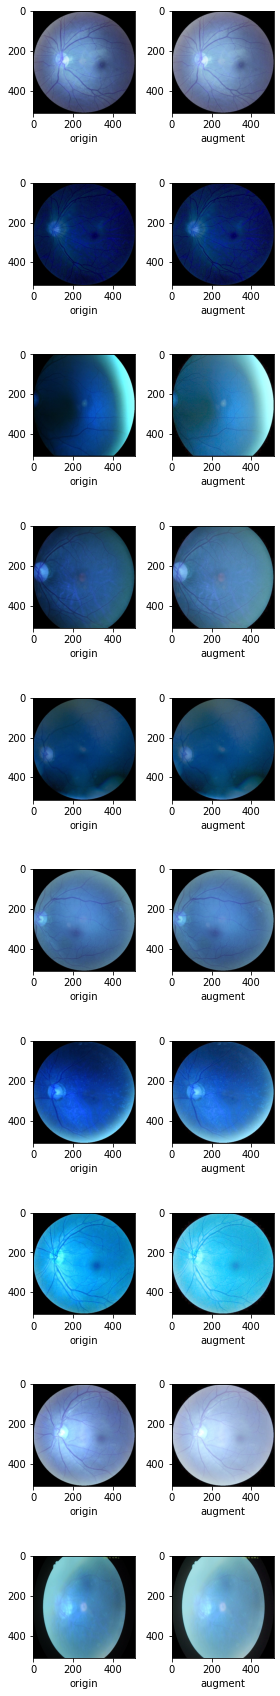

In [130]:
plt.figure(figsize=(4, 24))
i = 0
for image, image_aug in zip(images, images_aug):
    i += 1
    plt.subplot(len(images), 2, i)
    plt.imshow(image)
    plt.xlabel("origin")
    i += 1
    plt.subplot(len(images), 2, i)
    plt.imshow(image_aug)
    plt.xlabel("augment")
plt.tight_layout()